In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import datasets

%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
y_true = y_test

In [3]:
# parsing through the dataset

img_row, img_cols = 28,28


x_train = x_train.reshape(x_train.shape[0],img_cols*img_row)

x_test = x_test.reshape(x_test.shape[0],img_cols*img_row)


print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)

Train set shape (60000, 784) trainlabel shape (60000,)
test set shape (10000, 784) test labels: (10000,)


In [4]:
# split the train set to validatation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)
print('Val_set shape:', x_val.shape, 'val_label shape:', y_val.shape)
print('Test_set shape:', x_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (48000, 784) X_label shape: (48000,)
Val_set shape: (12000, 784) val_label shape: (12000,)
Test_set shape: (10000, 784) y_test shape: (10000,)


In [5]:
# normalization of data
x_train = (x_train - x_train.mean()) / x_train.std()

x_val = (x_val - x_val.mean()) / x_val.std()

x_test = (x_test - x_test.mean()) / x_test.std()

In [7]:
y_train = keras.utils.to_categorical(y_train)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)

print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)

print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (48000, 784) X_label shape: (48000, 10)
test set shape: (10000, 784) test label shape (10000, 10)
val set shape: (12000, 784) val_lavels shape: (12000, 10)


# Plot input data

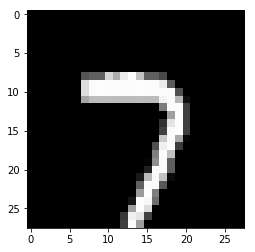

In [18]:
test_im = x_train[13]
plt.imshow(test_im.reshape(28,28), cmap='gray', interpolation='none')
plt.show()

In [8]:
## Defining a model architecture

batch_size = 16
num_classes = 10
epochs = 20

model = Sequential()

model.add(Dense(64, activation='tanh', input_shape=(784,)))


model.add(Dense(16, activation='tanh'))

# model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 51,450
Trainable params: 51,450
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(x_train, y_train, batch_size= 256, epochs= epochs, verbose=1, validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.6842 - acc: 0.8444 - val_loss: 0.3575 - val_acc: 0.9202
Epoch 2/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.2779 - acc: 0.9337 - val_loss: 0.2338 - val_acc: 0.9432
Epoch 3/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.1926 - acc: 0.9515 - val_loss: 0.1891 - val_acc: 0.9511
Epoch 4/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.1476 - acc: 0.9619 - val_loss: 0.1607 - val_acc: 0.9566
Epoch 5/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.1187 - acc: 0.9695 - val_loss: 0.1499 - val_acc: 0.9585
Epoch 6/20
48000/48000 [==============================] - 1s 17us/step - loss: 0.0985 - acc: 0.9753 - val_loss: 0.1391 - val_acc: 0.9616
Epoch 7/20
48000/48000 [==============================] - 1s 18us/step - loss: 0.0843 - acc: 0.9785 - val_loss: 0.1286 - val_acc

In [11]:
score = model.evaluate(x_test, y_test, verbose= 1)

10000/10000 [==============================] - 0s 25us/step


In [12]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11582171099646948
Test accuracy: 0.9685


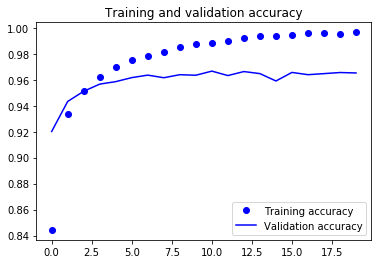

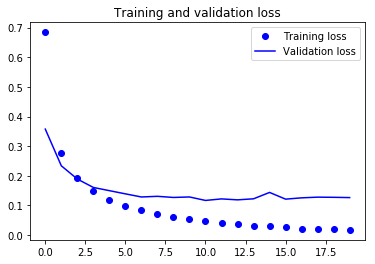

In [13]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [15]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.98      0.98      0.98       980
    Class 1       0.99      0.99      0.99      1135
    Class 2       0.96      0.97      0.96      1032
    Class 3       0.96      0.97      0.96      1010
    Class 4       0.97      0.97      0.97       982
    Class 5       0.97      0.96      0.96       892
    Class 6       0.96      0.97      0.97       958
    Class 7       0.96      0.96      0.96      1028
    Class 8       0.97      0.96      0.96       974
    Class 9       0.97      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000



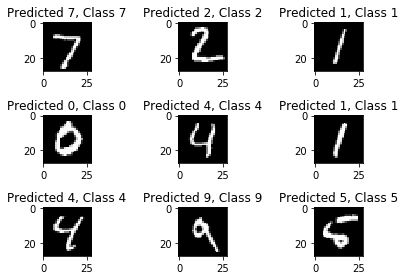

In [16]:
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()

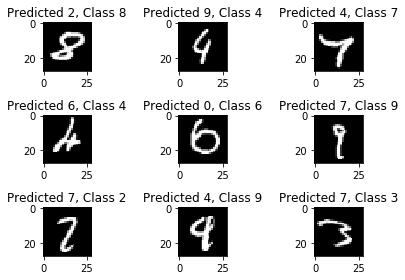

In [17]:
for i, inc in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[inc].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[inc], y_true[inc]))
    plt.tight_layout()

# Using different bencmark dataset 

In [ ]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
